## Simulazione dell'esame di Metodi Numerici


## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







In [3]:
from scipy.io import loadmat
import numpy as np

In [16]:
def is_simmetrica(A):
    return np.all(A.T==A)

def is_def_pos(A):
    autoval=np.linalg.eigvals(A)
    return np.all(autoval>0)

def is_quadrata(A):
    m,n=A.shape
    return m==n

def is_sparsa(A):
    m,n=A.shape
    values=np.count_nonzero(A)
    p=values/(n*m)*100
    return p<33

In [18]:
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)                
        x = x+alpha*p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=(r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

A è una matrice quadrata
A è una matrice sparsa di dimentsioni 300 x 300
è possibile applicare il metodo del gradiente
4001
326


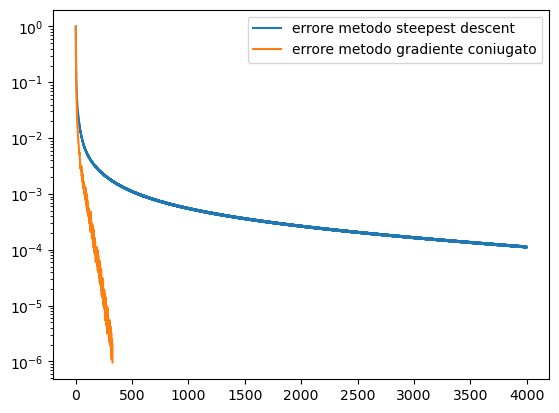

In [20]:
import matplotlib.pyplot as plt
dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
m,n=A.shape
x0=np.zeros_like(b)

if is_quadrata(A):
    print("A è una matrice quadrata")

if is_sparsa(A):
    print("A è una matrice sparsa di dimentsioni", m, "x",n )

if is_simmetrica(A) and is_def_pos(A):
    print("è possibile applicare il metodo del gradiente")

# la matrice è quadrata di grandi dimensioni (400x400) e sparsa quindi per la risoluzione utilizziamo i metodi iterativi per la soluzione di sistemi di equazioni 
# lineari, tra i metodi iterativi vi sono una famiglia di metodi applicabili a matrici simmetriche e definite positive come nel nostro caso, chiamato metodi 
# discesa 
# TEO: Sia A(nxn) una matrice simmetrica definita positiva, allora la risoluzione del sistema lineare Ax=b equivale a minimizzare la funzione F(x)=1/2*x.T*A*x-b.T*x

tol=1e-6
maxit=4000
x_sg,vet_r_sg,vec_sol_sg,it_sg=steepestdescent(A,b,x0,maxit,tol)
x_cg,vet_r_cg,vec_sol_cg,it_cg=conjugate_gradient(A,b,x0,maxit,tol)
print(it_sg)
print(it_cg)

plt.semilogy(range(it_sg+1), vet_r_sg,range(it_cg+1),vet_r_cg)
plt.legend(['errore metodo steepest descent','errore metodo gradiente coniugato'])


In [26]:
print(np.linalg.cond(A))
print((np.linalg.cond(A)-1)/(np.linalg.cond(A)+1))
print((np.sqrt(np.linalg.cond(A))-1)/(np.sqrt(np.linalg.cond(A))+1))
# la matrice ha è mal condizionata infatti K(A)>10^4, per entrambi i metodi la velocità di convergenza dipende dall'indice di condizionamento.
# la velocità di convergenza del metodo di discesa ripida è data da ||x_k-x|| <= (K(A)-1)/(K(A)+1) * ||x_0-x||, tanto più il termine (K(A)-1)/(K(A)+1) 
# è vicino ad 1 tanto più è lenta convergenza
# la velocità di convergenza del metodo del gradiente coniugato è data da ||x_k-x|| <= (np.sqrt(K(A))-1)/(np.sqrt(K(A))+1) * ||x_0-x||, tanto più il termine (K(A)-1)/(K(A)+1) 
# è vicino ad 1 tanto più è lenta convergenza
# nonostante entrambi i metodi dipendano da K(A) nel metodo del gradiente coniugato il termine K(A) è sotto radice e quindi meno soggetto al condizionamento,
# quindi a parità di K(A), la convergenza del gradiente coniugato è più veloce rispetto alla discesa ripida

10000.000000009008
0.9998000199980004
0.9801980198019891


127
30
20.958083832335323
0.9089173711480775
0.6414485466895313


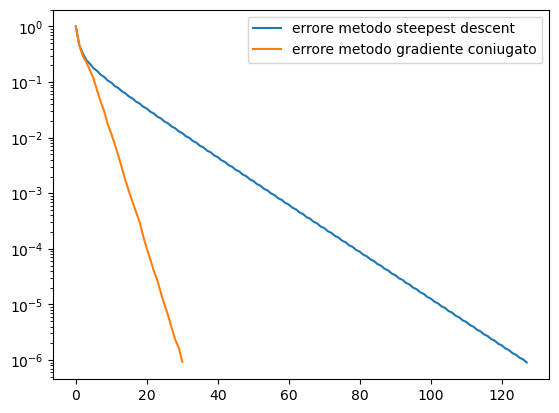

In [35]:
A1=A+np.eye(A.shape[0])*0.05
n=A1.shape[0]
b1=np.sum(A1,axis=1).reshape(n,1)
x=np.linalg.solve(A1,b1)
x0=np.zeros_like(b1)

tol=1e-6
maxit=4000
x_sg,vet_r_sg,vec_sol_sg,it_sg=steepestdescent(A1,b1,x0,maxit,tol)
x_cg,vet_r_cg,vec_sol_cg,it_cg=conjugate_gradient(A1,b1,x0,maxit,tol)
print(it_sg)
print(it_cg)

print(np.linalg.cond(A1))
print((np.linalg.cond(A1)-1)/(np.linalg.cond(A1)+1))
print((np.sqrt(np.linalg.cond(A1))-1)/(np.sqrt(np.linalg.cond(A1))+1))

plt.semilogy(range(it_sg+1), vet_r_sg,range(it_cg+1),vet_r_cg)
plt.legend(['errore metodo steepest descent','errore metodo gradiente coniugato'])

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

In [39]:
import scipy.linalg
import SolveTriangular
x = np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
y = np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59])

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [44]:
def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=scipy.linalg.qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

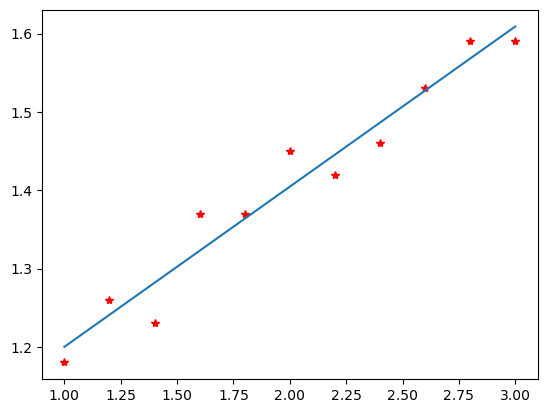

In [62]:
n=1
A=np.vander(x,increasing=True)[:,:n+1]
xx=np.linspace(np.min(x),np.max(x),200)

x_sol,res=qrLS(A,y)
pol=np.polyval(np.flip(x_sol),xx)

plt.plot(x,y,'r*',xx,pol)


- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [53]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
    n=x.size
    m=xx.size
    L=np.zeros((m,n))
    for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)


    return L@y

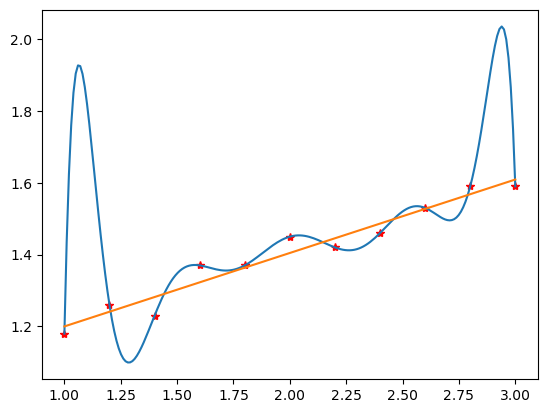

In [67]:
polL=InterpL(x,y,xx)

plt.plot(x,y,'r*',xx,polL,xx,pol)
plt.show()


- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

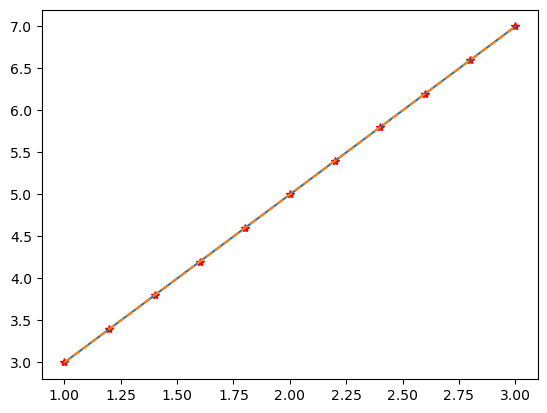

In [56]:
xx=np.linspace(np.min(x),np.max(x),200)
f= lambda x: 2*x+1
y=f(x)
polL=InterpL(x,y,xx)

degree=1
A=np.vander(x,increasing=True)[:,:n+1]
x1,res=qrLS(A,y)
pol_qr=np.polyval(np.flip(x1),xx)

plt.plot(x,y,'r*', xx, pol_qr,'-', xx, pol_qr,'--')


- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti$(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]
